In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (3).csv


In [4]:
import io
hd = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))
print(hd[hd['TenYearCHD'] == 1].shape[0])
print(hd[hd['TenYearCHD'] == 0].shape[0])
hd.drop(['education'], 
        axis = 1, 
        inplace = True)
hd.dropna(axis = 0, 
          inplace = True)
attrib = hd.iloc[:, :-1]
lab = hd.iloc[:, -1]

644
3596


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrib, lab, 
                                                    test_size = .20, 
                                                    random_state = 0)


In [6]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'random_normal', 
                bias_initializer = 'ones'))
                #activity_regularizer = regularizers.l2(0.001))) 
                #kernel_regularizer = regularizers.l1(0.01)))
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'random_normal', 
                bias_initializer = 'ones'))
                #activity_regularizer = regularizers.l2(0.001)))
                #kernel_regularizer = regularizers.l1(0.001))) 
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'random_normal', 
                bias_initializer = 'ones'))
                #activity_regularizer = regularizers.l2(0.01)))
                #kernel_regularizer = regularizers.l1(0.001))) 
                #bias_regularizer = regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [7]:
from keras import optimizers
#adam = optimizers.Adam(lr = 0.01)
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

In [8]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
class_weights = {0: 1.0, 1: 6.0}
history1 = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 20, 
          epochs = 100,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 2s 691us/step - loss: 2.3485 - acc: 0.5480 - val_loss: 1.1990 - val_acc: 0.6627
Epoch 2/100
2250/2250 [==============================] - 0s 175us/step - loss: 1.3368 - acc: 0.5716 - val_loss: 1.2251 - val_acc: 0.4147
Epoch 3/100
2250/2250 [==============================] - 0s 175us/step - loss: 1.2668 - acc: 0.5667 - val_loss: 1.2000 - val_acc: 0.5440
Epoch 4/100
2250/2250 [==============================] - 0s 182us/step - loss: 1.2284 - acc: 0.5644 - val_loss: 1.2084 - val_acc: 0.1773
Epoch 5/100
2250/2250 [==============================] - 0s 181us/step - loss: 1.2257 - acc: 0.5484 - val_loss: 1.1756 - val_acc: 0.3707
Epoch 6/100
2250/2250 [==============================] - 0s 173us/step - loss: 1.2447 - acc: 0.5689 - val_loss: 1.1816 - val_acc: 0.3360
Epoch 7/100
2250/2250 [==============================] - 0s 176us/step - loss: 1.21

In [9]:
val_acc = np.array(history1.history['val_acc'])
val_loss = np.array(history1.history['val_loss'])
model_acc = np.array(history1.history['acc'])
model_loss = np.array(history1.history['loss'])
print('Average validation loss:', val_loss.sum()/1000)
print('Average validation accuracy:', val_acc.sum()/1000)
print('Average loss:', model_loss.sum()/1000)
print('Average accuracy:', model_acc.sum()/1000)

Average validation loss: 0.1156072628966967
Average validation accuracy: 0.05312800015091896
Average loss: 0.11660599640846252
Average accuracy: 0.0638208889055252


In [10]:
evaluation = model.evaluate(x_train, y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

3000/3000 [==============================] - 0s 40us/step
Loss: 0.6170673480033875
Accuracy: 0.6546666665871939


In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.62982689747004


,Predicted: 0,Predicted: 1
Actual:0,414,233
Actual:1,45,59


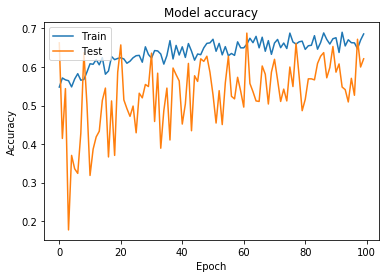

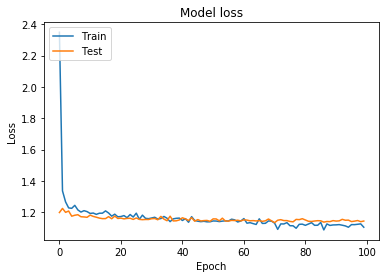

In [13]:
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()